In [11]:
from matplotlib import pyplot as plt
from sklearn import datasets
import numpy as np
import random
from IPython.display import clear_output

In [12]:
l2norm = lambda x: sum([i**2 for i in x])

normalize = lambda x, norm : x/norm(x)

def sign(x):
    if x>0:
        return 1
    elif x<0:
        return -1
    else:
        return 0

# input two numpy vectors
def linfun(w, x):
    return 1 if np.inner(w,x) > 0 else -1

# input a 2D vector to get the perpendicular to 
def prp2D(X):
    if X[0] != 0:
      temp = [-1*X[1]/X[0] , 1]
    else:
      temp = [1 , -1*X[0]/X[1]]
    return temp
    
class Perceptron():
    
    def __init__(self, data, objfunc, norm):
        self.data = data
        self.dataX = np.array([x for x, y in self.data])
        self.datay = np.array([y for x, y in self.data])
        self.dimension = len(self.data[0][0])
        self.objfunc = objfunc
        self.norm = norm
        self.w = np.array([0 for _ in range(self.dimension)])
        self.wprp = None
        self.plot_auto_update = False
        self.iteration = 0
        
    def display(self):
        fig = plt.figure(figsize=(10,8))
        plt.plot(self.dataX[:, 0][self.datay == 0], self.dataX[:, 1][self.datay == 0], 'r^')
        plt.plot(self.dataX[:, 0][self.datay == 1], self.dataX[:, 1][self.datay == 1], 'bs')
        plt.xlabel("feature 1")
        plt.ylabel("feature 2")
        plt.title('Random Classification Data with 2 classes')
        self.wprp = prp2D(self.w)
        plt.quiver([0], [0], self.w[0], self.w[1], color = 'black')
        plt.quiver([0], [0], self.wprp[0], self.wprp[1], color = 'g')
        plt.show()

    def auto_update_plot(self):
        if not self.plot_auto_update:
            auto_update = input(f"Iteration @ {self.iteration} Auto Update? (y/n):")
            if auto_update == 'y':
                self.plot_auto_update = True
            else:
                clear_output(wait=True)
        else:
            clear_output(wait=True)
    
    def fit(self):
        self.iteration = 0
        while True:
            solved = True
            # self.display()
            # self.auto_update_plot()
            x, y = random.choice(self.data)
            h = self.objfunc(self.w, x) # this will be '1' or '-1'
            if not ((y == h) or (y == 0 and h == -1)): # because when y = 0 and h = -1 it means the same thing
                t = -1 if y == 0 else 1
                self.w = self.w + t*x
                self.iteration += 1
                solved = False
            else:
                # Check if the model is solved
                for x, y in self.data:
                    h = self.objfunc(self.w, x) # this will be '1' or '-1'
                    if not ((h == y) or (h == -1 and y == 0)):
                        solved = False
                        break
            if solved:
                break
        self.display()

In [13]:
X, y = datasets.make_blobs(n_samples=10500,n_features=2,
                           centers=2,cluster_std=1.05,
                           random_state=51)

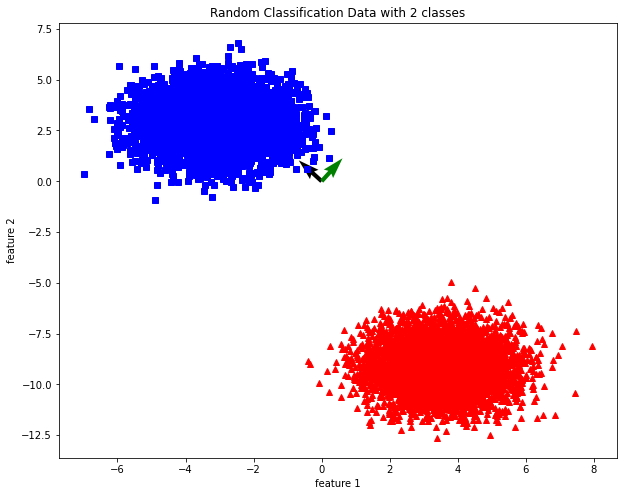

In [14]:
model_data = [(X[i], y[i]) for i in range(len(X))]
model = Perceptron(model_data, linfun, l2norm)
model.fit()

In [8]:
model.w

array([-3.57144094,  3.1660373 ])

In [9]:
prp2D(model.w)

[0.8864873730978824, 1]

In [10]:
model.wprp

[0.8864873730978824, 1]

In [ ]:
J